# **SIMPLE PERCEPTRON**

<img src="docs/images/percep.png" alt="alt text" width="600" />

In [1]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## Formulas

#### **NET**
$$
a =\sum_{i=1}^{n} w_i\,x_i + U
$$

In [2]:
def NET(Xi, W, b):
    net = 0.0
    for i in range(len(Xi)):
        net += Xi[i]*W[i]

    net += b

    return net

#### **F (Sigmoid)**

  * Activation Function
$$
f(a)=\dfrac{1}{1+e^{-a}}
$$

In [3]:
def sigmoid(NET):

    f = 1 / (1 + (m.e)**(-NET))

    return f


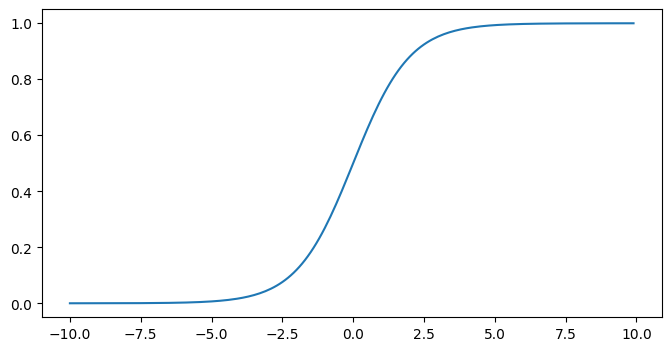

In [4]:
serie = np.arange(-10,10, 0.1)
calc = [sigmoid(i) for i in serie]

plt.figure(figsize=(8,4))
plt.plot(serie,calc)
plt.show()

#### **Weights Update**

$$
w_i \leftarrow w_i + \alpha\, · (loss.gradient)  
$$
$$
w_i \leftarrow w_i + \alpha\,(s - y)\,x_i,\qquad  
$$


In [5]:
def update_weights(W, Xi, alpha, s, y):

    if (s != y): W += alpha*(s - y)*Xi

    return W


#### **Bias Update**

$$
 b \leftarrow b - \alpha\, · (loss.gradient)  
$$

$$
 b \leftarrow b - \alpha\,(s - y)
$$


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Rango de valores de entrada z
z = np.linspace(-10, 10, 400)

# Función que actualiza el gráfico según el bias
def plot_sigmoid(bias=0.0):
    plt.figure(figsize=(10,4))
    plt.plot(z, sigmoid(z + bias), label=f"bias = {bias}")
    plt.axvline(0, color="k", linestyle="--", alpha=0.5)
    plt.axhline(0.5, color="gray", linestyle="--", alpha=0.5)
    plt.title("Impact of Bias on the Sigmoid Function")
    plt.xlabel("z (weighted sum of inputs)")
    plt.ylabel("σ(z + bias)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Deslizador interactivo
interact(plot_sigmoid, bias=(-5.0, 5.0, 0.1))
plt.show()


interactive(children=(FloatSlider(value=0.0, description='bias', max=5.0, min=-5.0), Output()), _dom_classes=(…

In [7]:
def U_update(U, alpha, s, y):
    
    if (s != y): U -= alpha*(s-y)

    return U

#### **Standardize**

In [8]:
def standardize(X):

    mu = X.mean(axis=0)
    std = X.std(axis=0)
    std = np.where(std == 0, 1, std)

    XS = (X - mu) / std

    return XS

## Defining Perceptron

In [9]:
class Perceptron:

    def __init__(self, tr_data, tr_target, alpha, epoch):
        
        self.X = self.standardize(tr_data)
        self.target = np.asarray(tr_target, dtype=float)
        self.alpha = alpha

        self.epoch = epoch

        self.n_inputs = self.X.shape[1]
        self.W = np.random.uniform(-0.5, 0.5, self.n_inputs)
        self.U = np.random.uniform(0, 1)


    def standardize(self, data):

        self.mu = data.mean(axis=0)
        self.std = data.std(axis=0)
        self.std = np.where(self.std == 0, 1, self.std)

        XS = (data - self.mu) / self.std

        return XS
    
    def standardize2(self, data):

        XS = (data - self.mu) / self.std

        return XS
    
    def NET(self, Xi):

        net = 0.0

        for i in range(len(Xi)):
            net += Xi[i]*self.W[i]

        # net = np.dot(self.W, Xi) - self.U    <-- much more efficente (C)

        net -= self.U

        return net
    
    def sigmoid(self, NET):

        # f = 1 / (1 + m.exp(-NET))      <--   overflows if NET > abs(700)
        # return f

        if NET >= 0:
            return 1 / (1 + m.exp(-NET))
        else:
            ez = m.exp(NET)        #  z is negative → ez ≪ 1
            return ez / (1 + ez)

        
    
    def step(self, y):

        return 1 if y >= 0 else 0
    
    def update_weights(self, Xi, s, y):

        for i, x in enumerate(Xi):

            self.W[i] += self.alpha*(s - y)*x

        # self.W += self.alpha*(s - y)*Xi   <-- same result, more efficent (vectorized)


    def update_U(self, s, y):
    
        self.U -= self.alpha*(s-y)

    
    
    def train(self):
        
        for k in range(self.epoch):
            for i, Xi in enumerate(self.X):

                s = self.target[i]

                net = self.NET(Xi)
                y = self.sigmoid(net)

                self.update_weights(Xi, s, y)
                self.update_U(s, y)

        print('Model Trained')

    def predict(self, ts_data):

        XS = self.standardize2(ts_data)

        self.results = np.zeros(len(ts_data), dtype=int)

        for i, Xi in enumerate(XS):

            net = self.NET(Xi)
            y = self.sigmoid(net)

            self.results[i] = 1 if y >= 0.5 else 0

    def compare(self, act_result):

        comp = self.results == act_result
        accuracy = comp.mean()

        return accuracy

## LOADING DATA

#### **IRIS DATASET**

In [10]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

# Selecting just 2 classes
X = X.iloc[0:100]
X = X.values

y = y[y != 2]

X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### **PIMA DIABETES DATASET**

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
pima = pd.read_csv(f"{path}/diabetes.csv")
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## TESTING

#### First, we’ll use the **Iris dataset**. Because it is small, we’ll train and test the model on the **entire dataset**—simply to run the code and **verify** that there are **no errors**.

In [12]:
perceptron = Perceptron(X, y, 0.2, 50)

In [13]:
perceptron.train()

Model Trained


In [14]:
perceptron.predict(X)
perceptron.compare(y)

np.float64(1.0)

#### Real test – we’ll use the Pima Diabetes dataset here, splitting it into separate training and testing sets.

In [15]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
pima.shape

(768, 9)

In [17]:
def split_process(df, prop, tgt_col):
    # prop = proportion, range(0.0, 1.0)
    # tgt_col = name of the class column

    idx = int(len(df) * prop)
    
    train = df.iloc[0:idx]
    test = df.iloc[idx:]

    tr_tgt = train[tgt_col].values
    train = train.drop(columns=tgt_col)
    train = train.values

    ts_tgt = test[tgt_col].values
    test = test.drop(columns=tgt_col)
    test = test.values

    return train, tr_tgt, test, ts_tgt

train, tr_tgt, test, ts_tgt = split_process(pima, 0.5, 'Outcome')


In [18]:
perceptron = Perceptron(train, tr_tgt, 0.1, 10)
perceptron.train()
perceptron.predict(test)
perceptron.compare(ts_tgt)

Model Trained


np.float64(0.8020833333333334)

#### Other confusion-matrix **metrics** (true-positive rate, false-positive rate, precision, F1, ROC-AUC, etc.) **could be reported**, but since this notebook’s **objective is to understand how a single perceptron** works, I’ve limited the evaluation to accuracy for now.